## Q1: MLR Stepwise Regression – Household Expense

500 households were surveyed on their monthly expenses. The data is in the file MLR_MonthlyExpense.
For this, use the monthly payment as the dependent variable.
- a) Begin with family size and iteratively add one variable and estimate the resulting
regression equation.
- b) Does adding any explanatory variable lead to a fall in adjusted R-Squared.
- c) Which variables are added in the final model?
- d) Interpret the coefficients, R-squared and standard error of estimate for the final
model.
- e) What result do you get if you use mlxtend stepwise regression?


The data files can be found here: https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment07

### Importing libraries and creating functions

#### Importing libraries

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Creating functions for OLS and Variance Inflation Factor

In [2]:
#Creating a function for carrying out the steps related to OLS

def ols_fn_print(y,x):
    X = x
    Y = y
    X = sm.add_constant(X)
    
    op_model = sm.OLS(Y,X).fit()
    print(op_model.summary())
    return op_model

def ols_fn(y,x):
    X = x
    Y = y
    X = sm.add_constant(X)
    
    op_model = sm.OLS(Y,X).fit()
    #print(op_model.summary()) #Not printing the summary
    return op_model

#Creating a function to return variance inflation factor

def vif(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X = x
    vif = pd.Series([variance_inflation_factor(X.values,i) 
                                   for i in range(X.shape[1])], 
                                   index=X.columns)
    return vif



#### Creating a function for the residual plot

In [3]:
#Creating a function for residual plot

def resid_plot(reg_model,feature):
    # Define figure size
    figure1 = plt.figure(figsize=(8,8))

    # Produce regression plots for logreg_model
    fig = sm.graphics.plot_regress_exog(reg_model, feature , fig = figure1)




#### Starting the solution:

In [4]:
df_monthly_expense_1 = pd.read_csv('MLR_MonthlyExpense.csv')
df_monthly_expense_1 .head()

,Household,Monthly Payment,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
0,1,"$1,585",2,2,0,1,"$96,709",$252,"$5,692"
1,2,"$1,314",6,2,1,0,"$77,470",$216,"$4,267"
2,3,$383,3,4,1,0,"$65,746",$207,"$2,903"
3,4,"$1,002",1,1,0,1,"$56,610",$249,"$3,896"
4,5,$743,3,3,1,0,"$59,185",$217,"$3,011"


In [5]:
#Checking data quality
df_monthly_expense_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Household        500 non-null    int64 
 1   Monthly Payment  500 non-null    object
 2   Family Size      500 non-null    int64 
 3   Sector No        500 non-null    int64 
 4   Rent             500 non-null    int64 
 5   Own              500 non-null    int64 
 6   Income           500 non-null    object
 7   Utilities        500 non-null    object
 8   Debt             500 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [6]:
df_monthly_expense_1.columns

Index(['Household', 'Monthly Payment', 'Family Size', 'Sector No', 'Rent',
       'Own', 'Income', 'Utilities', 'Debt'],
      dtype='object')

In [7]:
#Converting the column names to lower case

column_series = df_monthly_expense_1.columns

column_series  = column_series.str.lower()
column_series

Index(['household', 'monthly payment', 'family size', 'sector no', 'rent',
       'own', 'income', 'utilities', 'debt'],
      dtype='object')

In [8]:
#Renaming the columns to snake case
column_series = column_series.str.replace(' ','_')
column_series

Index(['household', 'monthly_payment', 'family_size', 'sector_no', 'rent',
       'own', 'income', 'utilities', 'debt'],
      dtype='object')

In [9]:
df_monthly_expense_1.columns = column_series
df_monthly_expense_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   household        500 non-null    int64 
 1   monthly_payment  500 non-null    object
 2   family_size      500 non-null    int64 
 3   sector_no        500 non-null    int64 
 4   rent             500 non-null    int64 
 5   own              500 non-null    int64 
 6   income           500 non-null    object
 7   utilities        500 non-null    object
 8   debt             500 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [10]:
df_monthly_expense_1.head()

,household,monthly_payment,family_size,sector_no,rent,own,income,utilities,debt
0,1,"$1,585",2,2,0,1,"$96,709",$252,"$5,692"
1,2,"$1,314",6,2,1,0,"$77,470",$216,"$4,267"
2,3,$383,3,4,1,0,"$65,746",$207,"$2,903"
3,4,"$1,002",1,1,0,1,"$56,610",$249,"$3,896"
4,5,$743,3,3,1,0,"$59,185",$217,"$3,011"


In [11]:
#Removing the $ sign and commas from the required columns and changing the data type to float

dollar_columns = ['monthly_payment', 'income', 'utilities', 'debt']

for column in dollar_columns:
    df_monthly_expense_1[column] = df_monthly_expense_1[column].str.replace('$','')
    df_monthly_expense_1[column] = df_monthly_expense_1[column].str.replace(',','')
    df_monthly_expense_1[column] = df_monthly_expense_1[column].astype(float)


df_monthly_expense_1.head()

,household,monthly_payment,family_size,sector_no,rent,own,income,utilities,debt
0,1,1585.0,2,2,0,1,96709.0,252.0,5692.0
1,2,1314.0,6,2,1,0,77470.0,216.0,4267.0
2,3,383.0,3,4,1,0,65746.0,207.0,2903.0
3,4,1002.0,1,1,0,1,56610.0,249.0,3896.0
4,5,743.0,3,3,1,0,59185.0,217.0,3011.0


In [12]:
df_monthly_expense_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   household        500 non-null    int64  
 1   monthly_payment  500 non-null    float64
 2   family_size      500 non-null    int64  
 3   sector_no        500 non-null    int64  
 4   rent             500 non-null    int64  
 5   own              500 non-null    int64  
 6   income           500 non-null    float64
 7   utilities        500 non-null    float64
 8   debt             500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


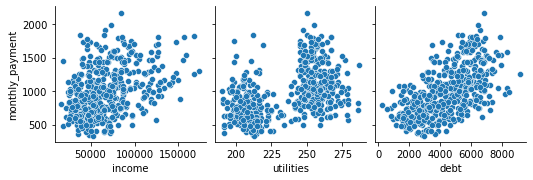

In [13]:
#Looking at the relationship of monthly payment with numerical variables

sns.pairplot(df_monthly_expense_1,
            x_vars =[ 'income', 'utilities', 'debt'],
            y_vars = 'monthly_payment')

<AxesSubplot:xlabel='family_size', ylabel='monthly_payment'>

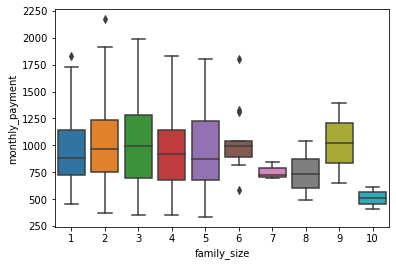

In [14]:
#Looking at the relationship of monthly payment with family size
#(Treating family size as a categorical variable)

sns.boxplot(data = df_monthly_expense_1, x = 'family_size', y = 'monthly_payment'  )


<AxesSubplot:xlabel='monthly_payment', ylabel='Density'>

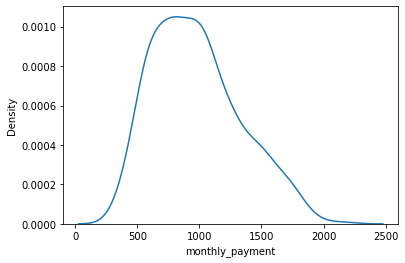

In [15]:
#Checking normality of the distribution

sns.kdeplot(x=df_monthly_expense_1.monthly_payment)

In [16]:
#checking for skewness
df_monthly_expense_1.skew()

household          0.000000
monthly_payment    0.558579
family_size        0.998252
sector_no          0.010764
rent               0.258901
own               -0.258901
income             0.998695
utilities         -0.168775
debt               0.088624
dtype: float64

In [17]:
#checking for kurtosis

import scipy.stats

scipy.stats.kurtosis(df_monthly_expense_1.monthly_payment)

-0.2894707729759989

In [18]:
df_monthly_expense_1.head()

,household,monthly_payment,family_size,sector_no,rent,own,income,utilities,debt
0,1,1585.0,2,2,0,1,96709.0,252.0,5692.0
1,2,1314.0,6,2,1,0,77470.0,216.0,4267.0
2,3,383.0,3,4,1,0,65746.0,207.0,2903.0
3,4,1002.0,1,1,0,1,56610.0,249.0,3896.0
4,5,743.0,3,3,1,0,59185.0,217.0,3011.0


In [19]:
#Dividing the data into dependent and independent variables



#### Skewness between -2 and +2 and Kurtosis between -3 and +3 is considered normal, hence we consider this distribution normal

In [20]:
col_list = list(df_monthly_expense_1.columns)

In [21]:
x_cols = col_list.remove('monthly_payment')

In [22]:
col_list

['household',
 'family_size',
 'sector_no',
 'rent',
 'own',
 'income',
 'utilities',
 'debt']

In [23]:
y =df_monthly_expense_1.monthly_payment
x = df_monthly_expense_1[col_list]

In [24]:
x.head()

,household,family_size,sector_no,rent,own,income,utilities,debt
0,1,2,2,0,1,96709.0,252.0,5692.0
1,2,6,2,1,0,77470.0,216.0,4267.0
2,3,3,4,1,0,65746.0,207.0,2903.0
3,4,1,1,0,1,56610.0,249.0,3896.0
4,5,3,3,1,0,59185.0,217.0,3011.0


In [25]:
y.head()

0    1585.0
1    1314.0
2     383.0
3    1002.0
4     743.0
Name: monthly_payment, dtype: float64

#### Since rent and own appear encoded columns, we will drop one of them.

In [26]:
x = x.drop(columns = 'rent')
x.head()

,household,family_size,sector_no,own,income,utilities,debt
0,1,2,2,1,96709.0,252.0,5692.0
1,2,6,2,0,77470.0,216.0,4267.0
2,3,3,4,0,65746.0,207.0,2903.0
3,4,1,1,1,56610.0,249.0,3896.0
4,5,3,3,0,59185.0,217.0,3011.0


In [27]:
x.describe()

,household,family_size,sector_no,own,income,utilities,debt
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2.996000,2.494000,0.564000,66211.110000,235.652000,4319.230000
std,144.481833,1.563609,1.131603,0.496384,29663.318811,25.881395,1726.049839
min,1.000000,1.000000,1.000000,0.000000,16971.000000,190.000000,227.000000
25%,125.750000,2.000000,1.000000,0.000000,44368.500000,209.000000,2948.500000
50%,250.500000,3.000000,2.000000,1.000000,59804.500000,246.000000,4267.500000
75%,375.250000,4.000000,4.000000,1.000000,81615.750000,257.000000,5675.500000
max,500.000000,10.000000,4.000000,1.000000,173706.000000,287.000000,9104.000000


In [28]:
# Household appears like household number, hence we can drop that as well

x = x.drop(columns = 'household')

In [29]:
x.head()

,family_size,sector_no,own,income,utilities,debt
0,2,2,1,96709.0,252.0,5692.0
1,6,2,0,77470.0,216.0,4267.0
2,3,4,0,65746.0,207.0,2903.0
3,1,1,1,56610.0,249.0,3896.0
4,3,3,0,59185.0,217.0,3011.0


#### Sector number can be considered a categorical variable and hence would be encoded

In [30]:
x.sector_no = x.sector_no.astype('str')

x = pd.get_dummies(x,drop_first=True)
x.head()

,family_size,own,income,utilities,debt,sector_no_2,sector_no_3,sector_no_4
0,2,1,96709.0,252.0,5692.0,1,0,0
1,6,0,77470.0,216.0,4267.0,1,0,0
2,3,0,65746.0,207.0,2903.0,0,0,1
3,1,1,56610.0,249.0,3896.0,0,0,0
4,3,0,59185.0,217.0,3011.0,0,1,0


#### Forward Selection - Starting iteratively with one variable - family size

In [31]:
x.columns

Index(['family_size', 'own', 'income', 'utilities', 'debt', 'sector_no_2',
       'sector_no_3', 'sector_no_4'],
      dtype='object')

In [32]:
a = ['family_size']
b = ['own', 'income', 'utilities', 'debt', 'sector_no_2',
         'sector_no_3', 'sector_no_4']

x_sel = x[a]
x_opt = x[b]

In [33]:
def print_and_append_2(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        reg_model = sm.OLS(Y,x1).fit()
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the selected factor ', a[0] , 'is, ', reg_model_values[1])
        print('The p value for the optional factor ', i, 'is, ', reg_model_values[2])
        print('The Adj R2 for the model', a[0], 'and', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[2])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [34]:
Y = y
X = x_opt

df_p_values_2 = print_and_append_2(Y,X)


The p value for the selected factor  family_size is,  0.09494156599352464
The p value for the optional factor  own is,  4.958287170500083e-41
The Adj R2 for the model family_size and own is 0.3053053697422107
----------------------------------------------
The p value for the selected factor  family_size is,  7.923270643108524e-05
The p value for the optional factor  income is,  7.193142672459181e-24
The Adj R2 for the model family_size and income is 0.18636965421667817
----------------------------------------------
The p value for the selected factor  family_size is,  6.429118609971439e-08
The p value for the optional factor  utilities is,  4.6977550334655935e-37
The Adj R2 for the model family_size and utilities is 0.2793587165280217
----------------------------------------------
The p value for the selected factor  family_size is,  1.820763399830992e-14
The p value for the optional factor  debt is,  2.8425647665216325e-63
The Adj R2 for the model family_size and debt is 0.43428646662

In [35]:
df_p_values_2.sort_values(by = 'p_value', inplace = True)

In [36]:
df_p_values_2

,variable,p_value
3,debt,2.842565e-63
0,own,4.958287e-41
6,sector_no_4,4.387965e-38
2,utilities,4.697755e-37
4,sector_no_2,1.686600e-26
1,income,7.193143e-24
5,sector_no_3,4.674456e-02


#### Selecting debt since it has the lowest p value and hence the highest significance

In [37]:
factor_to_add = df_p_values_2['variable'][0]
type(factor_to_add)

str

In [38]:
a.append(factor_to_add)
b.remove(factor_to_add)

In [39]:
x[a].columns

Index(['family_size', 'own'], dtype='object')

In [40]:
x[b].columns

Index(['income', 'utilities', 'debt', 'sector_no_2', 'sector_no_3',
       'sector_no_4'],
      dtype='object')

In [41]:
x_sel = x[a]
x_opt = x[b]

In [42]:
def print_and_append_3(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        print(list(x1.columns))
        reg_model = sm.OLS(Y,x1).fit()
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the selected factor ', a[0], 'is, ', reg_model_values[1])
        print('The p value for the selected factor ', a[1], 'is, ', reg_model_values[2])
        print('The p value for the optional factor ', i, 'is, ', reg_model_values[3])
        print('The Adj R2 for the model for the selected factors', a[0],a[1] , 'and optional factor', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[0])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [43]:
Y = y
X = x_opt

df_p_values_3 = print_and_append_3(Y,X)

['const', 'family_size', 'own', 'income']
The p value for the selected factor  family_size is,  0.00046380634370589804
The p value for the selected factor  own is,  5.730735883433404e-33
The p value for the optional factor  income is,  8.538117798231333e-16
The Adj R2 for the model for the selected factors family_size own and optional factor income is 0.3891641333212865
----------------------------------------------
['const', 'family_size', 'own', 'utilities']
The p value for the selected factor  family_size is,  0.8953883995199499
The p value for the selected factor  own is,  1.0196474810690164e-05
The p value for the optional factor  utilities is,  0.25336861399286487
The Adj R2 for the model for the selected factors family_size own and optional factor utilities is 0.3057351569474537
----------------------------------------------
['const', 'family_size', 'own', 'debt']
The p value for the selected factor  family_size is,  6.061119124478355e-11
The p value for the selected factor  own

In [44]:
df_p_values_3.sort_values(by = 'p_value', inplace = True)

In [45]:
df_p_values_3

,variable,p_value
5,sector_no_4,2.739375e-109
3,sector_no_2,1.404905e-90
4,sector_no_3,1.177427e-82
0,income,1.932814e-52
2,debt,1.070741e-45
1,utilities,3.855646e-03


In [46]:
df_p_values_3.reset_index(inplace = True, drop = True)
df_p_values_3

,variable,p_value
0,sector_no_4,2.739375e-109
1,sector_no_2,1.404905e-90
2,sector_no_3,1.177427e-82
3,income,1.932814e-52
4,debt,1.070741e-45
5,utilities,3.855646e-03


In [47]:
factor_to_add = df_p_values_3['variable'][0]
print('The selected factor is ', factor_to_add)

The selected factor is  sector_no_4


In [48]:
a

['family_size', 'own']

In [49]:
x[a].columns

Index(['family_size', 'own'], dtype='object')

In [50]:
a.append(factor_to_add)
b.remove(factor_to_add)

In [51]:
a

['family_size', 'own', 'sector_no_4']

In [52]:
b

['income', 'utilities', 'debt', 'sector_no_2', 'sector_no_3']

In [53]:
x_sel = x[a]
x_opt = x[b]

In [54]:
def print_and_append_4(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        reg_model = sm.OLS(Y,x1).fit()
        print(list(x1.columns))
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the factor ', a[0], 'is, ', reg_model_values[1])
        print('The p value for the factor ', a[1], 'is, ', reg_model_values[2])
        print('The p value for the factor ', a[2], 'is, ', reg_model_values[3])
        print('The p value for the factor ', i, 'is, ', reg_model_values[4])
        print('The Adj R2 for the model ', a[0],a[1],a[2], 'and', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[4])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [55]:
Y = y
X = x_opt

df_p_values_4 = print_and_append_4(Y,X)

['const', 'family_size', 'own', 'sector_no_4', 'income']
The p value for the factor  family_size is,  0.00333653621856676
The p value for the factor  own is,  7.74959178119005e-25
The p value for the factor  sector_no_4 is,  4.924549271045546e-15
The p value for the factor  income is,  5.790195627516032e-07
The Adj R2 for the model  family_size own sector_no_4 and income is 0.45927898621176577
----------------------------------------------
['const', 'family_size', 'own', 'sector_no_4', 'utilities']
The p value for the factor  family_size is,  0.8189092482953155
The p value for the factor  own is,  0.00015275247366058724
The p value for the factor  sector_no_4 is,  1.0073101336990923e-23
The p value for the factor  utilities is,  0.2731721052651205
The Adj R2 for the model  family_size own sector_no_4 and utilities is 0.43264089473796896
----------------------------------------------
['const', 'family_size', 'own', 'sector_no_4', 'debt']
The p value for the factor  family_size is,  2.61

In [56]:
df_p_values_4.sort_values(by = 'p_value', inplace = True)
df_p_values_4

,variable,p_value
2,debt,2.528271e-15
3,sector_no_2,1.949325e-09
4,sector_no_3,8.187344e-08
0,income,5.790196e-07
1,utilities,2.731721e-01


In [57]:
df_p_values_4.reset_index(inplace = True, drop = True)
df_p_values_4

,variable,p_value
0,debt,2.528271e-15
1,sector_no_2,1.949325e-09
2,sector_no_3,8.187344e-08
3,income,5.790196e-07
4,utilities,2.731721e-01


In [58]:
factor_to_add = df_p_values_4['variable'][0]
print('The selected factor is ', factor_to_add)

The selected factor is  debt


In [59]:
a.append(factor_to_add)
b.remove(factor_to_add)

In [60]:
x[a].columns

Index(['family_size', 'own', 'sector_no_4', 'debt'], dtype='object')

In [61]:
x[b].columns

Index(['income', 'utilities', 'sector_no_2', 'sector_no_3'], dtype='object')

In [62]:
x_sel = x[a]
x_opt = x[b]

In [64]:
def print_and_append_5(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        reg_model = sm.OLS(Y,x1).fit()
        print(list(x1.columns))
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the factor ', a[0], 'is, ', reg_model_values[1])
        print('The p value for the factor ', a[1], 'is, ', reg_model_values[2])
        print('The p value for the factor ', a[2], 'is, ', reg_model_values[3])
        print('The p value for the factor ', a[3], 'is, ', reg_model_values[4])
        print('The p value for the factor ', i, 'is, ', reg_model_values[5])
        print('The Adj R2 for the model ', a[0],a[1],a[2],a[3], 'and', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[5])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [65]:
Y = y
X = x_opt

df_p_values_5 = print_and_append_5(Y,X)

['const', 'family_size', 'own', 'sector_no_4', 'debt', 'income']
The p value for the factor  family_size is,  2.172515347469486e-08
The p value for the factor  own is,  0.01961827654074919
The p value for the factor  sector_no_4 is,  4.0920737059262374e-12
The p value for the factor  debt is,  9.899992072480111e-11
The p value for the factor  income is,  0.038224447997722955
The Adj R2 for the model  family_size own sector_no_4 debt and income is 0.5022280999599525
----------------------------------------------
['const', 'family_size', 'own', 'sector_no_4', 'debt', 'utilities']
The p value for the factor  family_size is,  0.0021247507835735055
The p value for the factor  own is,  0.13784235926007515
The p value for the factor  sector_no_4 is,  1.3997280658865972e-14
The p value for the factor  debt is,  3.348812108059886e-15
The p value for the factor  utilities is,  0.37978316445900695
The Adj R2 for the model  family_size own sector_no_4 debt and utilities is 0.49866128205695326
----

In [66]:

df_p_values_5.sort_values(by = 'p_value', inplace = True)
df_p_values_5

,variable,p_value
2,sector_no_2,8.624234e-07
3,sector_no_3,1.938604e-05
0,income,3.822445e-02
1,utilities,3.797832e-01


In [67]:
df_p_values_5.reset_index(inplace = True, drop = True)
df_p_values_5

,variable,p_value
0,sector_no_2,8.624234e-07
1,sector_no_3,1.938604e-05
2,income,3.822445e-02
3,utilities,3.797832e-01


In [68]:
factor_to_add = df_p_values_5['variable'][0]
print('The selected factor is ', factor_to_add)

The selected factor is  sector_no_2


In [69]:
a.append(factor_to_add)
b.remove(factor_to_add)

In [70]:
x[a].columns

Index(['family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2'], dtype='object')

In [71]:
x[b].columns

Index(['income', 'utilities', 'sector_no_3'], dtype='object')

In [72]:
x_sel = x[a]
x_opt = x[b]

In [74]:
def print_and_append_6(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        reg_model = sm.OLS(Y,x1).fit()
        print(list(x1.columns))
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the factor ', a[0], 'is, ', reg_model_values[1])
        print('The p value for the factor ', a[1], 'is, ', reg_model_values[2])
        print('The p value for the factor ', a[2], 'is, ', reg_model_values[3])
        print('The p value for the factor ', a[3], 'is, ', reg_model_values[4])
        print('The p value for the factor ', a[4], 'is, ', reg_model_values[5])
        print('The p value for the factor ', i, 'is, ', reg_model_values[6])
        print('The Adj R2 for the model ', a[0],a[1],a[2],a[3],a[4], 'and', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[6])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [75]:
Y = y
X = x_opt

df_p_values_6 = print_and_append_6(Y,X)


['const', 'family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'income']
The p value for the factor  family_size is,  2.309556098012266e-07
The p value for the factor  own is,  0.06858247722784998
The p value for the factor  sector_no_4 is,  2.322217951086179e-11
The p value for the factor  debt is,  1.1695990401798195e-10
The p value for the factor  sector_no_2 is,  7.310891781662732e-06
The p value for the factor  income is,  0.6297627716918432
The Adj R2 for the model  family_size own sector_no_4 debt sector_no_2 and income is 0.521174744403661
----------------------------------------------
['const', 'family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'utilities']
The p value for the factor  family_size is,  0.00204857263026547
The p value for the factor  own is,  0.2734585969572731
The p value for the factor  sector_no_4 is,  3.353543458816892e-12
The p value for the factor  debt is,  1.190738048707239e-12
The p value for the factor  sector_no_2 is,  1.14941843783043

In [76]:
df_p_values_6.sort_values(by = 'p_value', inplace = True)
df_p_values_6

,variable,p_value
2,sector_no_3,0.014409
1,utilities,0.606119
0,income,0.629763


In [78]:
df_p_values_6.reset_index(inplace = True, drop = True)
df_p_values_6

,variable,p_value
0,sector_no_3,0.014409
1,utilities,0.606119
2,income,0.629763


In [79]:
factor_to_add = df_p_values_6['variable'][0]
print('The selected factor is ', factor_to_add)

The selected factor is  sector_no_3


In [82]:
a.append(factor_to_add)
b.remove(factor_to_add)

In [83]:
x[a].columns

Index(['family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2',
       'sector_no_3'],
      dtype='object')

In [84]:
x[b].columns

Index(['income', 'utilities'], dtype='object')

In [85]:
x_sel = x[a]
x_opt = x[b]

In [88]:
def print_and_append_7(Y,X):
    X = X
    Y = Y
    df_p_values = pd.DataFrame()
    for i in X:
        x1 = pd.concat([x_sel,X[i]], join = 'outer', axis = 1)
        x1 = sm.add_constant(x1)
        reg_model = sm.OLS(Y,x1).fit()
        print(list(x1.columns))
        
        reg_model_index = reg_model.pvalues.index
        reg_model_values= reg_model.pvalues.values
        reg_model_rsqadj = reg_model.rsquared_adj
        zipped_object = zip(reg_model_index,reg_model_values)
        
        print('The p value for the factor ', a[0], 'is, ', reg_model_values[1])
        print('The p value for the factor ', a[1], 'is, ', reg_model_values[2])
        print('The p value for the factor ', a[2], 'is, ', reg_model_values[3])
        print('The p value for the factor ', a[3], 'is, ', reg_model_values[4])
        print('The p value for the factor ', a[4], 'is, ', reg_model_values[5])
        print('The p value for the factor ', a[5], 'is, ', reg_model_values[6])
        print('The p value for the factor ', i, 'is, ', reg_model_values[7])
        print('The Adj R2 for the model ', a[0],a[1],a[2],a[3],a[4],a[5], 'and', i ,'is' , reg_model.rsquared_adj)
        print('----------------------------------------------')
        
        df_reg_model_p_values = pd.DataFrame(zip([i],[float(reg_model_values[7])]),columns=['variable','p_value'])
        df_reg_model_p_values= df_reg_model_p_values[df_reg_model_p_values['variable'] != 'const']
        
        
        
        df_p_values = df_p_values.append(df_reg_model_p_values)
        
    print(df_p_values)
    df_p_values.reset_index(inplace = True, drop = True)
    return df_p_values

In [89]:

Y = y
X = x_opt

df_p_values_7 = print_and_append_7(Y,X)

['const', 'family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3', 'income']
The p value for the factor  family_size is,  2.9813650345216616e-07
The p value for the factor  own is,  0.11602238841765405
The p value for the factor  sector_no_4 is,  5.42068844252844e-12
The p value for the factor  debt is,  1.4922227760953018e-10
The p value for the factor  sector_no_2 is,  0.0007838506494709218
The p value for the factor  sector_no_3 is,  0.01655216098032095
The p value for the factor  income is,  0.9969699012699207
The Adj R2 for the model  family_size own sector_no_4 debt sector_no_2 sector_no_3 and income is 0.5257753983232356
----------------------------------------------
['const', 'family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3', 'utilities']
The p value for the factor  family_size is,  0.0009582917923867577
The p value for the factor  own is,  0.46702332799423063
The p value for the factor  sector_no_4 is,  7.42584254974145e-13
The p value

#### Thus we can see that the remaining columns are non-significant. Hence we will build the model based on the factors selected so far

In [90]:
a

['family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3']

In [91]:
b

['income', 'utilities']

In [93]:
Y = y
X = x[a]

reg_model_fwd = ols_fn_print(Y,X)

                            OLS Regression Results                            
Dep. Variable:        monthly_payment   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     93.56
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           3.64e-78
Time:                        03:17:24   Log-Likelihood:                -3454.6
No. Observations:                 500   AIC:                             6923.
Df Residuals:                     493   BIC:                             6953.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         774.6114     43.898     17.646      

#### Ans 1(a) -  The regression equation is mentioned below. 

monthly payment = 774.6114 -42.03 x family_size + 58.54 x own - 250 x sector_no_4 + 0.08 x debt + 108.80 x sector_no_2 - 77.93 x sector_no_3  

#### Ans 1(b) -  No, adding variables at each step increases the Adj R-square. This can be concluded by the iterations at each stage

#### 1(c)Which variables are added in the final model? (Ans below)

In [97]:
final_cols = list(x[a].columns)
print(final_cols)

['family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3']


#### Q.1(d) Interpret the coefficients, R-squared and standard error of estimate for the final model.

In [103]:
adj_rsq = round(reg_model_fwd.rsquared_adj,3)
print('The Adjusted R-Squared is ', adj_rsq, 'which means ', adj_rsq*100, ' % variation can be explained by the model')


The Adjusted R-Squared is  0.527 which means  52.7  % variation can be explained by the model


#### Standard Error of Regression is not mentioned, but it can be interpreted as deviation of actual values from the predicted values

#### Q1.e What result do you get if you use mlxtend stepwise regression?

In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt

In [106]:
lr = LinearRegression()

In [108]:
y =df_monthly_expense_1.monthly_payment
x = df_monthly_expense_1[col_list]

In [110]:
x.head()

,household,family_size,sector_no,rent,own,income,utilities,debt
0,1,2,2,0,1,96709.0,252.0,5692.0
1,2,6,2,1,0,77470.0,216.0,4267.0
2,3,3,4,1,0,65746.0,207.0,2903.0
3,4,1,1,0,1,56610.0,249.0,3896.0
4,5,3,3,1,0,59185.0,217.0,3011.0


In [112]:
sfs_forward = sfs(lr,
            k_features= (1,6),
            forward=True,
            floating=False,
            scoring='neg_mean_squared_error',
            cv=10)

sfs_fwd = sfs_forward.fit(X, y)

In [117]:
print('Best subset in Forward Selection by MLXtend:', sfs_fwd.k_feature_names_)

Best subset in Forward Selection by MLXtend: ('family_size', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3')


In [118]:
print('Best subset in Forward Selection by Statistical Modeling:', a)

Best subset in Forward Selection by Statistical Modeling: ['family_size', 'own', 'sector_no_4', 'debt', 'sector_no_2', 'sector_no_3']


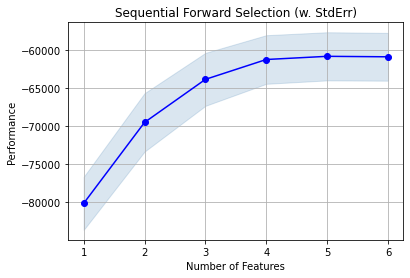

In [139]:
fig = plot_sfs(sfs_fwd.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

#### Ans 1(e) - The only additional factor shown by StatsModels is 'own' which indicates house ownership. It had a p-value of more than 0.05 but it was not dropped as in my opinion home ownership is a determinant of financial situation. Hence we can conclude that both approaches have given nearly identical result

## Q2: MLR Feature Selection – Box Office Revenue Prediction



An industry analyst is interested in building a predictive model to understand the impact of various factors and opening week revenue numbers in the overall collections of a movie (Total revenue).
Box Office collection of Bollywood movies were recorded. The data is provided in file: MLR_MovieBoxOffice_data.csv.
- a) Identify the variables that can be used to fit a linear regression model.
- b) How is the revenue impacted by genre of the movie?
- c) Does the month have any role to play in movie opening?
- d) Use any variable reduction technique to fit a model using all relevant variables.
- e) Do you find any outliers in the dataset? What could be the possible reason for those being outliers?

The data files can be found here: https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment07

#### Starting the solution:

In [120]:
df_box_office = pd.read_csv('MLR_MovieBoxOffice_data.csv')
df_box_office.head()

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
0,Angrezi Medium,9.36,4.03,9.03,9.36,Drama,145,Homi Adajania,Mar,2020
1,Baaghi 3,93.37,17.50,53.83,90.67,Action,147,Ahmed Khan,Mar,2020
2,Thappad,30.61,3.07,14.66,22.79,Drama,142,Anubhav Sinha,Feb,2020
3,Shubh Mangal Zyada Saavdhan,62.78,9.55,32.66,44.84,Comedy,120,Hitesh Kewalya,Feb,2020
4,Bhoot: Part One - The Haunted Ship,31.97,5.10,16.36,24.18,Horror,117,Bhanu Pratap Singh,Feb,2020


In [121]:
#Checking data quality
df_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_name               130 non-null    object 
 1   revenue_total            130 non-null    float64
 2   revenue_opening_day      130 non-null    float64
 3   revenue_opening_weekend  130 non-null    float64
 4   revenue_firstweek        130 non-null    float64
 5   movie_genre              130 non-null    object 
 6   runtime                  130 non-null    int64  
 7   movie_director           130 non-null    object 
 8   release_month            130 non-null    object 
 9   release_year             130 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 10.3+ KB


In [122]:
df_box_office.columns

Index(['movie_name', 'revenue_total', 'revenue_opening_day',
       'revenue_opening_weekend', 'revenue_firstweek', 'movie_genre',
       'runtime', 'movie_director', 'release_month', 'release_year'],
      dtype='object')

In [135]:
#Checking the number of groups for different categorical variables

categorical_cols = ['movie_genre', 'movie_director', 'release_month', 'release_year']
total_categories = []
for col in categorical_cols:
    total_categories.append(len(df_box_office[col].unique()))
    print('The number of categories for the column ', col,' are ',len(df_box_office[col].unique()))
print('The total number of categories across the dataframe are', sum(total_categories))

The number of categories for the column  movie_genre  are  16
The number of categories for the column  movie_director  are  116
The number of categories for the column  release_month  are  12
The number of categories for the column  release_year  are  4
The total number of categories across the dataframe are 148


In [138]:
df_box_office.shape

(130, 10)

#### Thus we can see once dummy coding is implemented, the total number of columns would exceed the number of rows in the dataset. Hence an OLS estimation may not be feasible.

#### Since p > n, Shrinkage methods would be required to continue

#### Dummy Encoding the dataframe to enable regression

In [140]:
#First we convert year also into an object, so that Python treats it like a Categorical Variable

In [142]:
df_box_office['release_year'] = df_box_office['release_year'].astype('object')

df_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_name               130 non-null    object 
 1   revenue_total            130 non-null    float64
 2   revenue_opening_day      130 non-null    float64
 3   revenue_opening_weekend  130 non-null    float64
 4   revenue_firstweek        130 non-null    float64
 5   movie_genre              130 non-null    object 
 6   runtime                  130 non-null    int64  
 7   movie_director           130 non-null    object 
 8   release_month            130 non-null    object 
 9   release_year             130 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 10.3+ KB


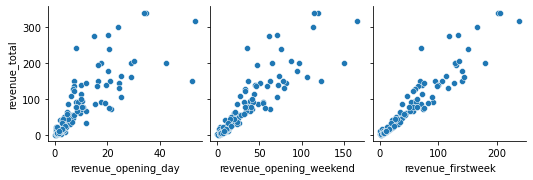

In [143]:
#Looking at the relationship of total revenue with numerical variables

sns.pairplot(df_box_office,
            x_vars =[ 'revenue_opening_day', 'revenue_opening_weekend', 'revenue_firstweek'],
            y_vars = 'revenue_total')

<AxesSubplot:xlabel='movie_genre', ylabel='revenue_total'>

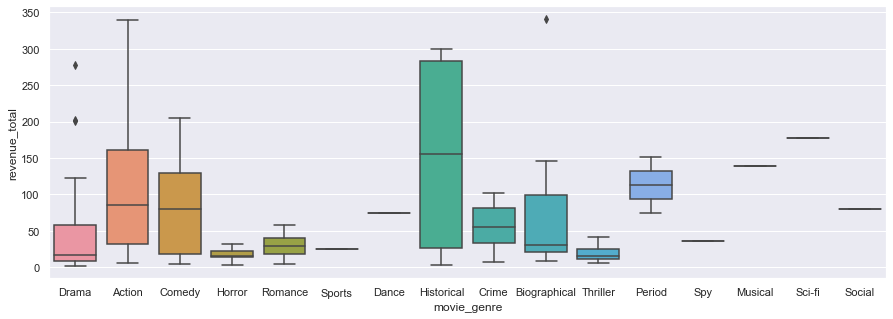

In [150]:
#Looking at the relationship of total revenue with categorical variables
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data = df_box_office, x= 'movie_genre' , y = 'revenue_total' )

<AxesSubplot:xlabel='movie_director', ylabel='revenue_total'>

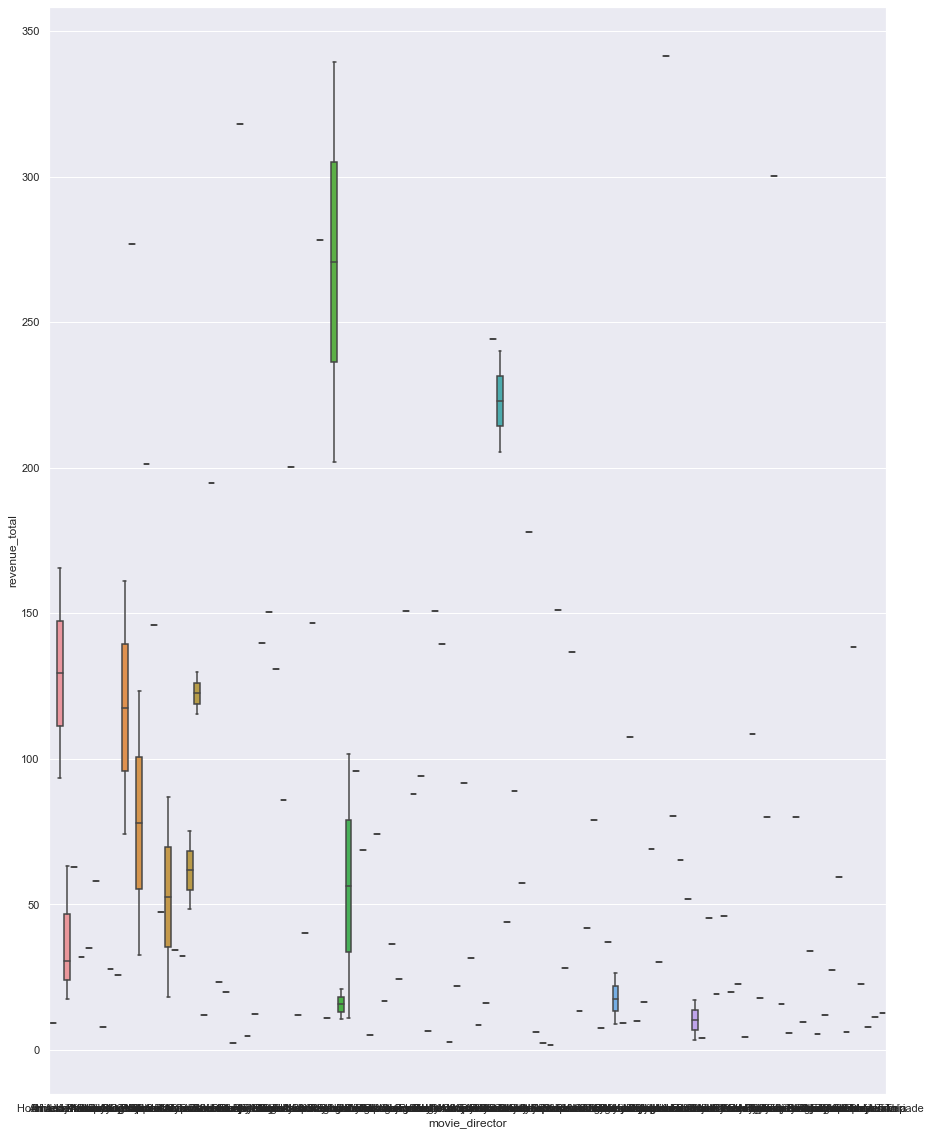

In [159]:
#Looking at the relationship of total revenue with categorical variables
sns.set(rc={'figure.figsize':(15,20)})
sns.boxplot(data = df_box_office, x= 'movie_director' , y = 'revenue_total' )


In [167]:
df_box_office['movie_director'].value_counts().sort_values(ascending = False)

Anubhav Sinha      3
Meghna Gulzar      2
Mudassar Aziz      2
Ahmed Khan         2
Hansal Mehta       2
                  ..
Abhishek Varman    1
Soumik Sen         1
Om Raut            1
Rajiev Dhingra     1
Abhishek Pathak    1
Name: movie_director, Length: 116, dtype: int64

<AxesSubplot:xlabel='release_month', ylabel='revenue_total'>

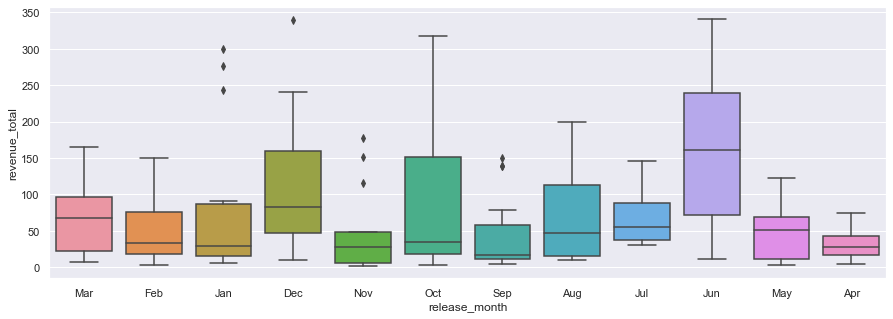

In [152]:
#Looking at the relationship of total revenue with categorical variables
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data = df_box_office, x= 'release_month' , y = 'revenue_total' )

<AxesSubplot:xlabel='release_year', ylabel='revenue_total'>

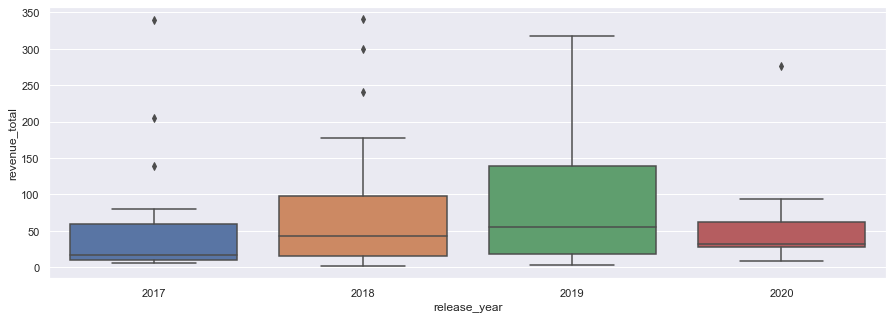

In [153]:
#Looking at the relationship of total revenue with categorical variables
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data = df_box_office, x= 'release_year' , y = 'revenue_total' )

#### As per the analysis, the max that any director has directed is 3 movies. The sample is very small to demonstrate the impact of one director. The boxplot also has no apparent pattern. Hence we can drop the 'director' column.

#### We can also exclude the factor, 'movie name' from the consideration

<AxesSubplot:xlabel='revenue_total', ylabel='Density'>

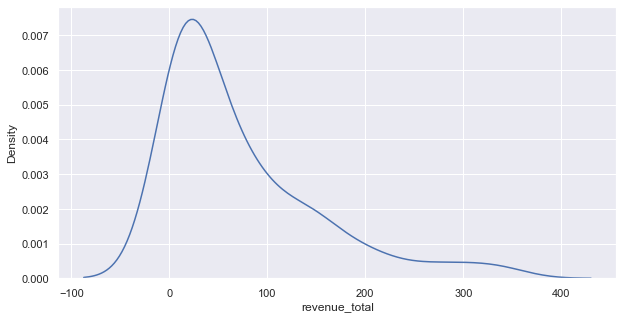

In [178]:
#Checking for the normality of the distribution
sns.set(rc={'figure.figsize':(10,5)})
sns.kdeplot(df_box_office.revenue_total)

In [179]:
#It appears skewed. Checking for skewness numerically

#checking for skewness
df_box_office.revenue_total.skew()

1.5969137047466817

In [180]:
#Checking for kurtosis:

import scipy.stats

scipy.stats.kurtosis(df_box_office.revenue_total)

2.063123147054581

#### Skewness between -2 and +2 and Kurtosis between -3 and +3 is considered normal, hence we consider this distribution normal

In [174]:
y = df_box_office.revenue_total
x = df_box_office[['revenue_opening_day',
       'revenue_opening_weekend', 'revenue_firstweek', 'movie_genre',
       'runtime', 'release_month', 'release_year']]
    


In [175]:
y.head()

0     9.36
1    93.37
2    30.61
3    62.78
4    31.97
Name: revenue_total, dtype: float64

In [176]:
x.head()

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,release_month,release_year
0,4.03,9.03,9.36,Drama,145,Mar,2020
1,17.50,53.83,90.67,Action,147,Mar,2020
2,3.07,14.66,22.79,Drama,142,Feb,2020
3,9.55,32.66,44.84,Comedy,120,Feb,2020
4,5.10,16.36,24.18,Horror,117,Feb,2020


#### Dummy encoding x so that categorical variables can be used for regression

In [181]:
x = pd.get_dummies(x, drop_first = True)
x.head()

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime,movie_genre_Biographical,movie_genre_Comedy,movie_genre_Crime,movie_genre_Dance,movie_genre_Drama,movie_genre_Historical,...,release_month_Jul,release_month_Jun,release_month_Mar,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep,release_year_2018,release_year_2019,release_year_2020
0,4.03,9.03,9.36,145,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,17.50,53.83,90.67,147,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,3.07,14.66,22.79,142,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,9.55,32.66,44.84,120,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.10,16.36,24.18,117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [184]:
x.shape

(130, 33)

In [185]:
x.columns

Index(['revenue_opening_day', 'revenue_opening_weekend', 'revenue_firstweek',
       'runtime', 'movie_genre_Biographical', 'movie_genre_Comedy',
       'movie_genre_Crime', 'movie_genre_Dance', 'movie_genre_Drama',
       'movie_genre_Historical', 'movie_genre_Horror', 'movie_genre_Musical',
       'movie_genre_Period', 'movie_genre_Romance', 'movie_genre_Sci-fi',
       'movie_genre_Social', 'movie_genre_Sports', 'movie_genre_Spy',
       'movie_genre_Thriller', 'release_month_Aug', 'release_month_Dec',
       'release_month_Feb', 'release_month_Jan', 'release_month_Jul',
       'release_month_Jun', 'release_month_Mar', 'release_month_May',
       'release_month_Nov', 'release_month_Oct', 'release_month_Sep',
       'release_year_2018', 'release_year_2019', 'release_year_2020'],
      dtype='object')

#### Ans 2 (a) - The variables to fit a linear regression model are mentioned above

#### Creating a model using forward selection in Machine Learning


In [186]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [193]:
lr = LinearRegression()

sfs_fwd = sfs(lr,
             k_features = (1,33),
             forward = True,
              floating = False,
              scoring = 'neg_mean_squared_error',
              cv = 5,
             )

sfs_fwd.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 33),
                          scoring='neg_mean_squared_error')

In [200]:
sfs_fwd.k_feature_names_

('revenue_opening_day',
 'revenue_firstweek',
 'movie_genre_Comedy',
 'movie_genre_Crime',
 'movie_genre_Historical',
 'movie_genre_Thriller',
 'release_month_Dec')

In [201]:
list1 = list(sfs_fwd.k_feature_names_)

In [202]:
list1

['revenue_opening_day',
 'revenue_firstweek',
 'movie_genre_Comedy',
 'movie_genre_Crime',
 'movie_genre_Historical',
 'movie_genre_Thriller',
 'release_month_Dec']

#### Now that the features have been selected, we can build a Linear Regression model

In [205]:
x_new = x [list(sfs_fwd.k_feature_names_)]

lr_model_box_office = LinearRegression()
lr_model_box_office.fit(x_new,y)

LinearRegression()

In [209]:
lr_coefficients = lr_model_box_office.coef_
lr_variables = list(x_new.columns)

zip_list = list(zip(lr_variables,lr_coefficients))
zip_list

[('revenue_opening_day', -4.029110162530395),
 ('revenue_firstweek', 2.2813222830986573),
 ('movie_genre_Comedy', 4.000358811825551),
 ('movie_genre_Crime', 8.987130844892908),
 ('movie_genre_Historical', 28.93920510403889),
 ('movie_genre_Thriller', -3.5738578105617687),
 ('release_month_Dec', -11.566581438631703)]

#### Ans 2 (b) - Impact of genre

- If the genre is Comedy, the revenue increases by 4 units. 
- If the genre is Crime, the revenue increases by 8.98 units. 
- If the genre is Historical, the revenue increases by 28.93 units. 
- If the genre is Thriller, the revenue decreases by 3.57 units. 

#### Ans 2 (c) -  Role of the month in movie opening

- As per the feature selection process, none of the month related features were selected. Hence we can consider that the month does not play any role in the revenue 


#### Q 2 (d) - Use any variable reduction technique to fit a model using all relevant variables.

#### Ans 2 (d) - Forward Selection Technique already used

#### Q 2 (e) Do you find any outliers in the dataset? What could be the possible reason for those being outliers?

#### Solution - Using OLS for outlier detection

In [210]:
reg_model_box_office = ols_fn_print(y,x_new)


                            OLS Regression Results                            
Dep. Variable:          revenue_total   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     288.7
Date:                Sat, 10 Sep 2022   Prob (F-statistic):           9.73e-73
Time:                        04:10:59   Log-Likelihood:                -565.06
No. Observations:                 130   AIC:                             1146.
Df Residuals:                     122   BIC:                             1169.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

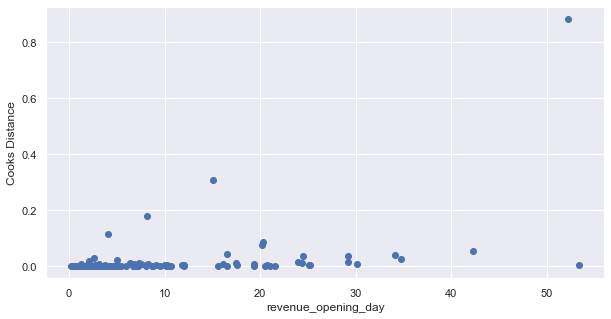

In [215]:
influence = reg_model_box_office.get_influence()

cooks_dist = influence.cooks_distance

plt.scatter(x_new.revenue_opening_day, cooks_dist[0])
plt.xlabel('revenue_opening_day')
plt.ylabel('Cooks Distance')
plt.show()

In [216]:
x_new['cooks_dist'] =  cooks_dist[0]

x_new[x_new['cooks_dist'] > 0.09]

,revenue_opening_day,revenue_firstweek,movie_genre_Comedy,movie_genre_Crime,movie_genre_Historical,movie_genre_Thriller,release_month_Dec,cooks_dist
11,15.10,118.91,0,0,1,0,0,0.305871
17,4.12,25.68,0,0,1,0,1,0.113028
62,8.20,70.94,0,0,0,0,0,0.177907
71,52.25,140.40,0,0,0,0,0,0.882906


In [225]:
x_outliers = x_new[x_new['cooks_dist'] > 0.09]
outliers_revenue_opening_day = list(x_outliers['revenue_opening_day'])



df_box_office_outliers = df_box_office.loc[df_box_office.apply(lambda x: x.revenue_opening_day in outliers_revenue_opening_day , axis=1)]

df_box_office_outliers

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
11,Tanhaji: The Unsung Warrior,276.90,15.10,61.75,118.91,Historical,134,Om Raut,Jan,2020
17,Panipat,34.28,4.12,17.68,25.68,Historical,162,Ashutosh Gowariker,Dec,2019
62,Uri: The Surgical Strike,244.06,8.20,35.73,70.94,Action,138,Aditya Dhar,Jan,2019
71,Thugs Of Hindostan,151.04,52.25,123.00,140.40,Action,165,Vijay Krishna Acharya,Nov,2018


#### Ans 2(e) - Based on domain knowledge of Hindi cinema, it can be suggested that these movies were highly anticipated and hence ended up being outliers in terms of total revenue

## Q3. MLR – Feature Selection – Building Energy Efficiency

A study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters. 
We perform energy analysis using 12 different building shapes.
The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses (heating load and cooling load). File: MLR_BuildingEfficiency.csv
 
- 1) Which features impact the heating load? 
- 2) Which features impact the cooling load?

The data files can be found here: https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment07

In [231]:
df_building_efficiency = pd.read_csv('MLR_BuildingEfficiency.csv')
df_building_efficiency.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [232]:
df_building_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [237]:
col_list = list(df_building_efficiency.columns)
col_list = [x.lower() for x in col_list]
col_list

['relative_compactness',
 'surface_area',
 'wall_area',
 'roof_area',
 'overall_height',
 'orientation',
 'glazing_area',
 'glazing_area_distribution',
 'heating_load',
 'cooling_load']

In [238]:
df_building_efficiency.columns = col_list
df_building_efficiency.columns

Index(['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution', 'heating_load', 'cooling_load'],
      dtype='object')

In [239]:
#Checking the value counts for a few features:

df_building_efficiency.glazing_area.value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: glazing_area, dtype: int64

In [240]:
df_building_efficiency.glazing_area_distribution.value_counts()

1    144
2    144
3    144
4    144
5    144
0     48
Name: glazing_area_distribution, dtype: int64

In [241]:
df_building_efficiency.orientation.value_counts()

2    192
3    192
4    192
5    192
Name: orientation, dtype: int64

In [243]:
df_building_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [244]:
# We treat the feature orientation like a categorical variable

df_building_efficiency.orientation = df_building_efficiency.orientation.astype('object')
df_building_efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    object 
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 60.1+ KB


In [250]:
#Dividing the dataframe into x and y 

y_heat = df_building_efficiency.heating_load
y_cool = df_building_efficiency.cooling_load

x = df_building_efficiency[['relative_compactness', 'surface_area', 'wall_area', 'roof_area',
       'overall_height', 'orientation', 'glazing_area',
       'glazing_area_distribution']]


In [251]:
y_heat.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: heating_load, dtype: float64

In [252]:
y_cool.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: cooling_load, dtype: float64

In [253]:
x.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [260]:
x = pd.get_dummies(x, drop_first = True )
x.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,glazing_area,glazing_area_distribution,orientation_3,orientation_4,orientation_5
0,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,1,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,0.0,0,0,0,0


#### Choosing the ElasticNet model for feature selection

In [266]:
from sklearn.linear_model import ElasticNetCV

enCV_model = ElasticNetCV(cv=5, random_state=0)
enCV_model.fit(x, y_heat)

print("Best Alpha:", enCV_model.alpha_ )

print("Model Coefficients:", enCV_model.coef_)


Best Alpha: 5.057548622919119
Model Coefficients: [-0.         -0.0553698   0.10573076 -0.06625213  0.          0.
  0.          0.         -0.         -0.        ]


In [262]:
#Creating a dataframe

data = {'Features' : list(x.columns), 
        'Coefficients' :  enCV_model.coef_}

df_encv_heat_load = pd.DataFrame(data)
df_encv_heat_load

,Features,Coefficients
0,relative_compactness,-0.000000
1,surface_area,-0.055370
2,wall_area,0.105731
3,roof_area,-0.066252
4,overall_height,0.000000
5,glazing_area,0.000000
6,glazing_area_distribution,0.000000
7,orientation_3,0.000000
8,orientation_4,-0.000000
9,orientation_5,-0.000000


#### Thus, based on Elastic Net feature selection method, the features impacting the heating load are 'Surface Area', 'Wall Area' and 'Roof Area'

In [267]:
enCV_model2 = ElasticNetCV(cv=5, random_state=0)
enCV_model2.fit(x, y_cool)

print("Best Alpha:", enCV_model2.alpha_ )

print("Model Coefficients:", enCV_model2.coef_)


Best Alpha: 3.2082106602059817
Model Coefficients: [-0.         -0.05788973  0.09887792 -0.05349614  0.          0.
  0.         -0.         -0.          0.        ]


In [268]:
#Creating a dataframe

data2 = {'Features' : list(x.columns), 
        'Coefficients' :  enCV_model2.coef_}

df_encv_cool_load = pd.DataFrame(data2)
df_encv_cool_load

,Features,Coefficients
0,relative_compactness,-0.000000
1,surface_area,-0.057890
2,wall_area,0.098878
3,roof_area,-0.053496
4,overall_height,0.000000
5,glazing_area,0.000000
6,glazing_area_distribution,0.000000
7,orientation_3,-0.000000
8,orientation_4,-0.000000
9,orientation_5,0.000000


#### Thus, based on Elastic Net feature selection method, the features impacting the cooling load are the same as those impacting heating load -  'Surface Area', 'Wall Area' and 'Roof Area'